### Importing the required libraries and packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa import arima

#For auto arima
from pmdarima import auto_arima

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

Here we are converting the Month column into datetime as it is object format

In [3]:
sales_data = pd.read_csv('Champagne Sales.csv')
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

#Here are we are setting the index of the dataframe to the variable
sales_data.set_index('Month', inplace = True)
sales_data

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


### Plotting the series created

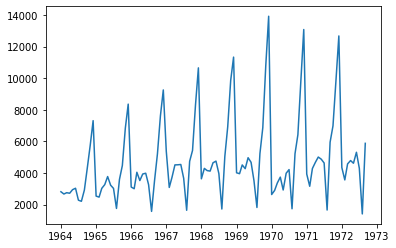

In [4]:
plt.plot(sales_data)
plt.show()

**Here we can observe that there is a seasonality associated with data as every year there is a spike in increasing sales**

### Checking if the series is in stationarity or not

In [5]:
result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.833593
p-value: 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


### Plotting acf and pacf plots

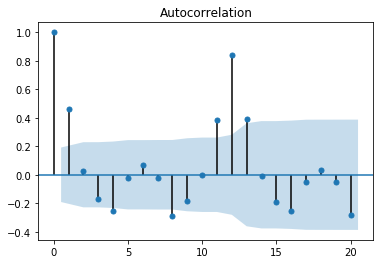

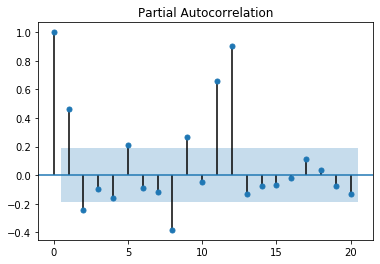

In [6]:
plot_acf(sales_data, lags=20)
plot_pacf(sales_data, lags=20, method='ols')
plt.show()

### Splitting the dataset in to train and test data

In [7]:
train_data = sales_data.iloc[0:85]
test_data = sales_data.iloc[-20:]

### Grid Search and Finding the parameters

In [8]:
arima_model =  auto_arima(np.asarray(train_data),start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=1.50 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.60 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.40 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.38 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.60 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.20 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.39 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.779, Time=1.42 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.79 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [9]:
# Summary of the auto-arima model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Fri, 18 Jun 2021   AIC                           1174.564
Time:                                     15:30:31   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (Q):                       49.92   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.14   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using the Recommended Fit

In [10]:
model = arima.model.ARIMA(train_data, order=(1,1,2), seasonal_order=(0,1,0,12))
model_fitted = model.fit()
model_fitted.params
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                   Champagne sales   No. Observations:                   85
Model:             ARIMA(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                           Fri, 18 Jun 2021   AIC                           1174.564
Time:                                   15:30:36   BIC                           1183.670
Sample:                               01-01-1964   HQIC                          1178.189
                                    - 01-01-1971                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (Q):                       49.92   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.14   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predicting the sales

In [14]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test_data.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.698357
1971-03-01,3247.922582
1971-04-01,3592.499227
1971-05-01,2800.884291
1971-06-01,3841.896068
1971-07-01,4088.027010
1971-08-01,1596.299494
1971-09-01,5090.005349
1971-10-01,6284.000031


### Plotting the Test data, training data and Predicted Data

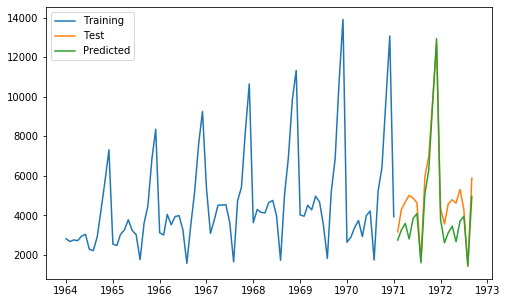

In [15]:
plt.figure(figsize=(8,5))
plt.plot(train_data,label="Training")
plt.plot(test_data,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

### Calculating R2 Value

In [17]:
from sklearn.metrics import r2_score
test_data['predicted_sales'] = prediction
r2_score(test_data['Champagne sales'], test_data['predicted_sales'])

0.8114751634315541